<a href="https://colab.research.google.com/github/YasinnSoylu/Fake-News-Classifier-ML/blob/main/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The aim of the project is to build a fake news classifier using Natural Language Processing.

In [30]:
## Loading necessary libraries
import nlp_utils
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt # for data visualization
from nltk.corpus import stopwords



In [31]:
## Reading the data
df=pd.read_csv('train.csv')

In [32]:
df.shape
## There are 20800 rows and 5 columns as seen above

(20800, 5)

In [33]:
pd.set_option('display.max_colwidth', -1)
## Increasing the width of the the columns

<ipython-input-33-260807becfea>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [34]:
df['title']
## Title contains the headline of the news

0        House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It            
1        FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart                                      
2        Why the Truth Might Get You Fired                                                            
3        15 Civilians Killed In Single US Airstrike Have Been Identified                              
4        Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery
                                                     ...                                              
20795    Rapper T.I.: Trump a ’Poster Child For White Supremacy’                                      
20796    N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times                            
20797    Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times             
20798    NATO, Russia To Hold Parallel Exercises In Balkans              

In [35]:
df['text']
## text contains the information regarding the headline.

0        House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was review

In [36]:
df['label'].value_counts()
## There are 10413 'ones' and 10387 'zeroes' in the dataframe

1    10413
0    10387
Name: label, dtype: int64

In [37]:
df.isnull().sum()
## There are few null values present in the dataframe

id        0   
title     558 
author    1957
text      39  
label     0   
dtype: int64

In [38]:
df=df.dropna()
## The null values are removed using the dropna function

In [39]:
df.isnull().sum()
## As seen below there are no null values present in the dataframe now.

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [40]:
df.reset_index(inplace=True)
## As we can see in the output, the Series. reset_index() function has reset the index of the given Series.

In [41]:
df

index     id  \
0      0      0       
1      1      1       
2      2      2       
3      3      3       
4      4      4       
...   ..     ..       
18280  20795  20795   
18281  20796  20796   
18282  20797  20797   
18283  20798  20798   
18284  20799  20799   

                                                                                               title  \
0      House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It               
1      FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart                                         
2      Why the Truth Might Get You Fired                                                               
3      15 Civilians Killed In Single US Airstrike Have Been Identified                                 
4      Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery   
...                                                                                              ...   
18280  Rapper T.I.: Trump a ’Poster Child For White Supremacy’                                         
18281  N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times                               
18282  Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times                
18283  NATO, Russia To Hold Parallel Exercises In Balkans                                              
18284  What Keeps the F-35 Alive                                                                       

                                          author  \
0      Darrell Lucus                               
1      Daniel J. Flynn                             
2      Consortiumnews.com                          
3      Jessica Purkiss                             
4      Howard Portnoy                              
...               ...                              
18280  Jerome Hudson                               
18281  Benjamin Hoffman                            
18282  Michael J. de la Merced and Rachel Abrams   
18283  Alex Ansary                                 
18284  David Swanson                               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Mean Length 4800.181843040744
Min Length 1
Max Length 142961


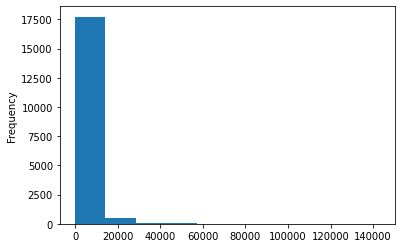

In [42]:
# Character Length of Titles - Min, Mean, Max
print('Mean Length', df['text'].apply(len).mean())
print('Min Length', df['text'].apply(len).min())
print('Max Length', df['text'].apply(len).max())

x = df['text'].apply(len).plot.hist()

In [43]:
import re
import string

# *Text cleaning*

In [44]:
# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
df['text'] = df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [45]:
df['text']

0        house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it by darrell lucus on october      subscribe jason chaffetz on the stump in american fork  utah   image courtesy michael jolley  available under a creative commons by license   with apologies to keith olbermann  there is no doubt who the worst person in the world is this week fbi director james comey  but according to a house democratic aide  it looks like we also know who the second worst person is as well  it turns out that when comey sent his now infamous letter announcing that the fbi was looking into emails that may be related to hillary clinton s email server  the ranking democrats on the relevant committees didn t hear about it from comey  they found out via a tweet from one of the republican committee chairmen   as we now know  comey notified the republican chairmen and democratic ranking members of the house intelligence  judiciary  and oversight committees that his agency was reviewing em

## Removing stop words and stemming the text

#### In natural language processing, useless words (data), are referred to as stop words. ... Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

#### The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

## Splitting the dataframe

In [48]:
Y=df['label']


In [49]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [50]:
data_pos = df[ df['label'] == 1]
data_pos = df['text']

data_neg = df[ df['label'] == 0]
data_neg = df['text']

In [51]:

def wordcloud_draw(df, color = 'black'):
    words = ' '.join(df)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
     

In [52]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


FAKE  NEWS


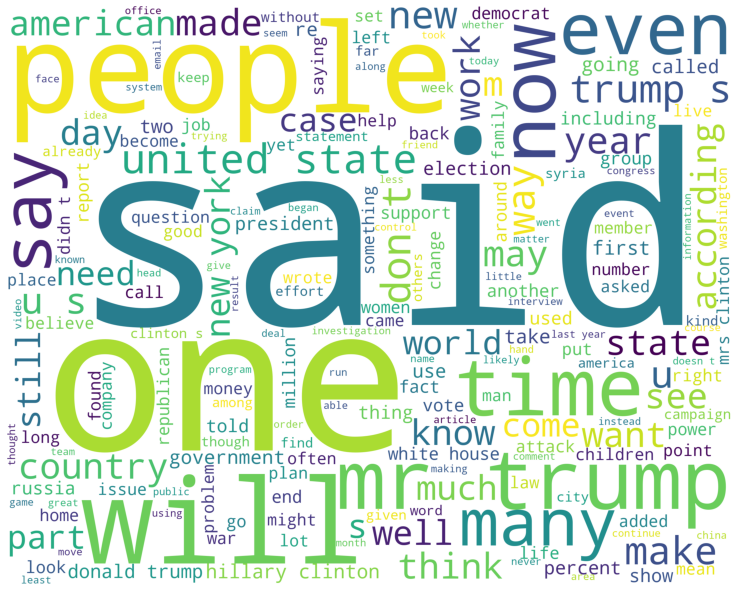

In [53]:
print("FAKE  NEWS")
wordcloud_draw(data_pos,'white')

REAL  NEWS


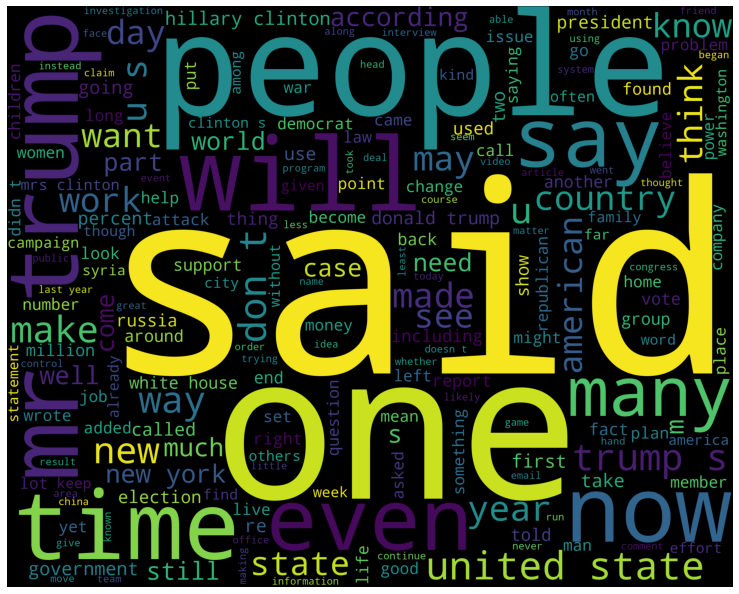

In [54]:
print("REAL  NEWS")
wordcloud_draw(data_neg)

## Making train and test data

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], Y, test_size=0.2, random_state=40)


### Tfidf vectorizer

Understanding TfidfVectorizer Using a Simple Example
The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Alternately, if you already have a learned CountVectorizer, you can use it with a TfidfTransformer to just calculate the inverse document frequencies and start encoding documents.

In [56]:
#Applying tfidf to the data set
tfidf_vect = TfidfVectorizer(stop_words = 'english',max_df=0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [57]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vect.get_feature_names()[-10:])

['zwrotu', 'zwyci', 'zxycmwjdxj', 'zyaratgah', 'zygankow', 'zylinderkopfdichtung', 'zynga', 'zytsov', 'zyuganov', 'zzzzs']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Count vectorizer

Understanding CountVectorizer
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

You can use it as follows:

Create an instance of the CountVectorizer class.
Call the fit() function in order to learn a vocabulary from one or more documents.
Call the transform() function on one or more documents as needed to encode each as a vector.
An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.

In [58]:
count_vect = CountVectorizer(stop_words = 'english')
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

In [59]:
# Get the feature names of `count_vectorizer` 
print(count_vect.get_feature_names()[0:20])

['aa', 'aaa', 'aaah', 'aaahhh', 'aaajiao', 'aaany', 'aaas', 'aab', 'aabb', 'aac', 'aachen', 'aadara', 'aadmi', 'aae', 'aag', 'aah', 'aahhh', 'aahs', 'aaib', 'aaii']


## Machine learning

# 1. Naive Bayes model

### TF-Idf vectorized 

In [60]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

accuracy:   0.779


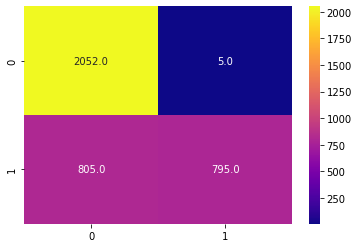

In [62]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(tfidf_train, Y_train)                       
pred = clf.predict(tfidf_test)                     
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)



cm = metrics.confusion_matrix(Y_test, pred)
sns.heatmap(cm, cmap="plasma", annot=True,fmt=".1f")


In [63]:
print('Wrong predictions out of total')
print((Y_test !=pred).sum(),'/',((Y_test == pred).sum()+(Y_test != pred).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred))

Wrong predictions out of total
810 / 3657
Percentage accuracy:  77.850697292863


In [64]:
## Plotting confusion matrix for TF-Idf vectorizer

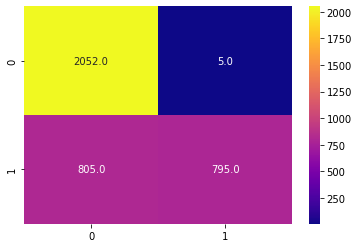

In [65]:
sns.heatmap(cm, cmap="plasma", annot=True,fmt=".1f")

### Count Vectorized

accuracy:   0.909


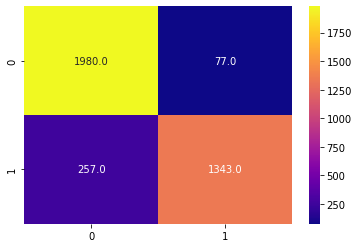

In [66]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(count_train, Y_train)                       
pred1 = clf.predict(count_test)                    
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y_test, pred1)
sns.heatmap(cm2, cmap="plasma", annot=True,fmt=".1f")


In [67]:
print('Wrong predictions out of total')
print((Y_test !=pred1).sum(),'/',((Y_test == pred1).sum()+(Y_test != pred1).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred1))

Wrong predictions out of total
334 / 3657
Percentage accuracy:  90.8668307355756


# 2. Random Forest Model

In [68]:
from sklearn.ensemble import RandomForestClassifier

### TF-Idf Vectorized

In [69]:
RF=RandomForestClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds2 = RF.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = RF.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)

Model accuracy on train is:  0.9999316379546076
Model accuracy on test is:  0.9081214109926169
--------------------------------------------------


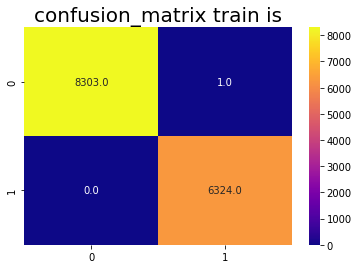

In [70]:
#Confusion matrix
plt.title('confusion_matrix train is', fontsize = 20) # title with fontsize 20
sns.heatmap(metrics.confusion_matrix(Y_train, train_preds2), cmap="plasma", annot=True,fmt=".1f")

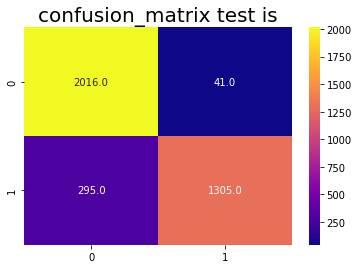

In [71]:
plt.title('confusion_matrix test is', fontsize = 20) # title with fontsize 20
sns.heatmap(metrics.confusion_matrix(Y_test, test_preds2), cmap="plasma", annot=True,fmt=".1f")
plt.show()

In [72]:
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

Wrong predictions out of total
--------------------------------------------------
336 / 3657
--------------------------------------------------


### Count Vectorized

In [73]:
RF=RandomForestClassifier().fit(count_train,Y_train)
#predict on train 
train_preds3 = RF.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = RF.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)

Model accuracy on train is:  0.9999316379546076
Model accuracy on test is:  0.9070276182663385
--------------------------------------------------


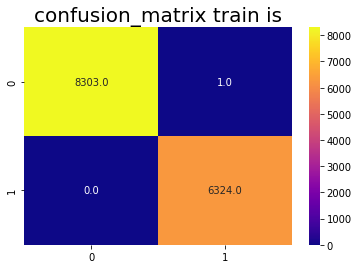

In [74]:
#Confusion matrix
plt.title('confusion_matrix train is', fontsize = 20) # title with fontsize 20
sns.heatmap(metrics.confusion_matrix(Y_train, train_preds3), cmap="plasma", annot=True,fmt=".1f")
plt.show()

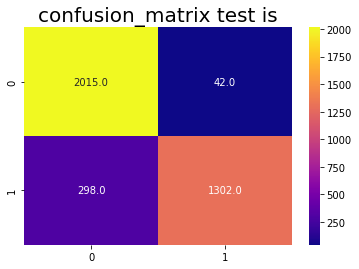

In [75]:
plt.title('confusion_matrix test is', fontsize = 20) # title with fontsize 20
sns.heatmap(metrics.confusion_matrix(Y_test, test_preds3), cmap="plasma", annot=True,fmt=".1f")
plt.show()

In [76]:
# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

340 / 3657
--------------------------------------------------


# K-Nearest Neighbour

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds4 = KNN.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = KNN.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)

Model accuracy on train is:  0.5235849056603774
Model accuracy on test is:  0.4965818977303801
--------------------------------------------------


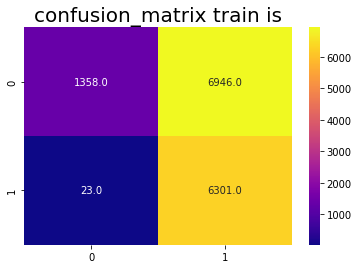

In [79]:
#Confusion matrix
plt.title('confusion_matrix train is', fontsize = 20) # title with fontsize 20
sns.heatmap(metrics.confusion_matrix(Y_train, train_preds4), cmap="plasma", annot=True,fmt=".1f")


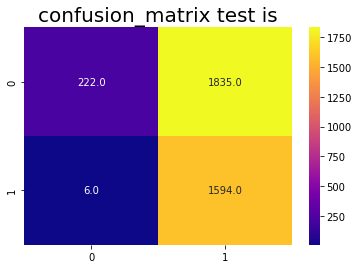

In [80]:
plt.title('confusion_matrix test is', fontsize = 20) # title with fontsize 20
sns.heatmap(metrics.confusion_matrix(Y_test, test_preds4), cmap="plasma", annot=True,fmt=".1f")
plt.show()

In [81]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(count_train,Y_train)
#predict on train 
train_preds5 = KNN.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

Model accuracy on train is:  0.7880776592835658
Model accuracy on test is:  0.7404976756904567
--------------------------------------------------


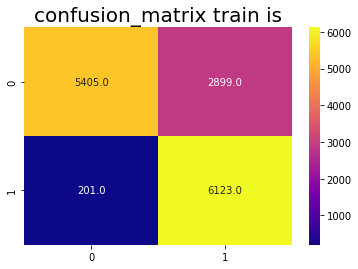

In [82]:
#Confusion matrix
plt.title('confusion_matrix train is', fontsize = 20) # title with fontsize 20
sns.heatmap(metrics.confusion_matrix(Y_train, train_preds5), cmap="plasma", annot=True,fmt=".1f")

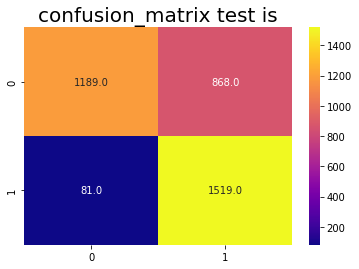

In [83]:
plt.title('confusion_matrix test is', fontsize = 20) # title with fontsize 20
sns.heatmap(metrics.confusion_matrix(Y_test, test_preds5), cmap="plasma", annot=True,fmt=".1f")
plt.show()